In [1]:
import os
import numpy as np
import mne
print (mne.__version__)
from scipy.io import loadmat, savemat
from mne.io import read_raw_egi, read_raw_fif
#import matplotlib.pyplot as plt
#%matplotlib notebook
import sys
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs
sys.path.insert(0, 'C:/Users/Antoine/github/MEG_pareidolia/python_scripts/Functions')
import MEG_pareidolia_utils
from MEG_pareidolia_utils import *
from PARAMS import *

1.2.2


(array([5.500e+01, 5.200e+01, 6.000e+00, 4.900e+01, 1.010e+02, 5.500e+01,
        1.500e+02, 1.530e+02, 5.500e+01, 1.040e+02, 1.040e+02, 1.990e+02,
        6.100e+01, 1.530e+02, 1.070e+02, 1.310e+02, 3.210e+02, 3.640e+02,
        3.330e+02, 5.630e+02, 6.240e+02, 6.300e+02, 6.150e+02, 7.830e+02,
        5.170e+02, 4.590e+02, 2.780e+02, 5.200e+02, 5.080e+02, 4.250e+02,
        4.890e+02, 8.350e+02, 9.140e+02, 1.062e+03, 1.211e+03, 1.089e+03,
        9.850e+02, 7.070e+02, 7.250e+02, 7.400e+02, 1.037e+03, 8.290e+02,
        8.780e+02, 1.236e+03, 1.511e+03, 1.407e+03, 1.964e+03, 1.560e+03,
        1.398e+03, 1.747e+03, 1.830e+03, 1.646e+03, 1.667e+03, 1.796e+03,
        2.022e+03, 2.123e+03, 2.154e+03, 2.111e+03, 2.442e+03, 2.102e+03,
        1.954e+03, 2.099e+03, 2.319e+03, 2.726e+03, 2.723e+03, 2.469e+03,
        1.841e+03, 2.773e+03, 2.704e+03, 2.802e+03, 2.426e+03, 2.389e+03,
        2.346e+03, 3.072e+03, 2.456e+03, 2.312e+03, 2.439e+03, 1.994e+03,
        2.061e+03, 2.557e+03, 1.706e+0

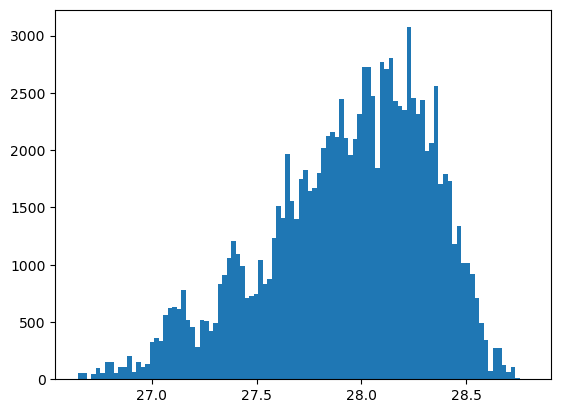

In [10]:
import matplotlib.pyplot as plt
s = '09'
run = '1'
psd_stage = 'PSD_RT_run_slope_corrected'
task = 'pareidolia'
psd_name, psd_path = get_pareidolia_bids(
                            FOLDERPATH, s, task, run, stage=psd_stage, cond=None
                        )

PSD = loadmat(psd_path)
PSD = PSD["PSD"]
PSD = np.moveaxis(PSD, 1, 2)
PSD.shape
# plot distribution of values
plt.figure()
plt.hist(PSD.flatten(), bins=100)

In [12]:
PSD.shape

(52, 270, 8)

In [4]:
import pandas as pd
path = 'C:/Users/Antoine/github/MEG_pareidolia/Merged_dataframes/df_ALL_metadata_MEG_sub00to11_epo_RT_early3s_real_RT_corrected_4-90Hz_nperseg300_earlyVSlate_3sec.csv'

# load csv file

data = pd.read_csv(path)

Correlation: 0.121
p-value: 0.708


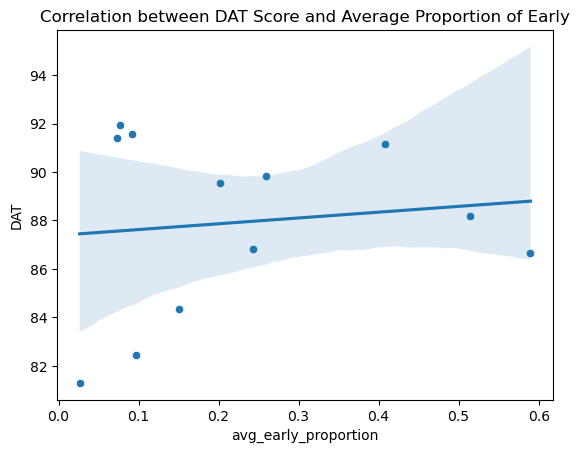

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import pearson 
from scipy.stats import pearsonr

# Calculate the average proportion of 'early' for each participant
avg_early = data.groupby('participant')['earlyVSlate'].apply(lambda x: (x == 1).mean()).reset_index()
avg_early.columns = ['participant', 'avg_early_proportion']

# Merge with DAT scores
merged_data = pd.merge(avg_early, data[['participant', 'DAT']].drop_duplicates(), on='participant')

# Plotting
sns.scatterplot(data=merged_data, x='avg_early_proportion', y='DAT')
plt.title('Correlation between DAT Score and Average Proportion of Early')
plt.xlabel('Average Proportion of Early Trials')
plt.ylabel('DAT Score')
# add regression line
sns.regplot(data=merged_data, x='avg_early_proportion', y='DAT', scatter=False)
# compute correlation
corr, p = pearsonr(merged_data['avg_early_proportion'], merged_data['DAT'])
print('Correlation: %.3f' % corr)
print('p-value: %.3f' % p)
plt.show()



In [6]:
data

,electrodes,delta,theta,alpha,low_beta,high_beta,gamma1,gamma2,7,trials,...,FD,FD_class,n_obj,n_obj_class,parei,contrast,earlyVSlate,spont_par,LZ,DAT
0,0,-273.890584,-275.616420,-277.162717,-278.865850,-280.287454,-284.932209,-284.946689,-287.088692,0,...,1.725,2,0.0,0,0,0.0,0,0,0.477003,91.554412
1,1,-272.738226,-274.384568,-276.350212,-277.553243,-278.326468,-282.978557,-284.526215,-286.122397,0,...,1.725,2,0.0,0,0,0.0,0,0,0.477003,91.554412
2,2,-271.118122,-272.005566,-274.376298,-276.484401,-277.687359,-283.024864,-284.270368,-284.927223,0,...,1.725,2,0.0,0,0,0.0,0,0,0.477003,91.554412
3,3,-269.032691,-269.423534,-271.706022,-273.808647,-274.771954,-282.367302,-284.676789,-284.574160,0,...,1.725,2,0.0,0,0,0.0,0,0,0.442932,91.554412
4,4,-268.096829,-268.263038,-271.190557,-273.971147,-273.589479,-280.169990,-282.447292,-283.126442,0,...,1.725,2,0.0,0,0,0.0,0,0,0.451450,91.554412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923935,265,-273.378978,-272.432698,-274.831685,-278.798293,-280.118632,-283.711385,-287.582083,-288.129346,51,...,1.650,1,0.0,0,0,1.0,0,0,0.459968,91.399824
923936,266,-273.446799,-272.007974,-271.871895,-275.338934,-278.569017,-284.484165,-285.849876,-286.369512,51,...,1.650,1,0.0,0,0,1.0,0,0,0.391824,91.399824
923937,267,-275.766252,-276.102499,-275.411519,-278.503924,-282.502609,-283.034985,-286.719572,-285.376392,51,...,1.650,1,0.0,0,0,1.0,0,0,0.528111,91.399824
923938,268,-287.577443,-283.392661,-278.054277,-281.634473,-285.591854,-285.817118,-286.413664,-288.687155,51,...,1.650,1,0.0,0,0,1.0,0,0,0.706987,91.399824


In [20]:
# average across electrodes

data = data.groupby(['participant','bloc','trials']).mean().reset_index()

In [21]:
std_parei = data_.groupby(['FD', 'participant'])['parei'].std()
std_parei

FD    participant
1.05  0              0.512989
      1              0.442326
      2              0.483046
      3              0.204124
      4              0.282330
                       ...   
1.95  7              0.204124
      8              0.464306
      9              0.000000
      10             0.494535
      11             0.510418
Name: parei, Length: 156, dtype: float64

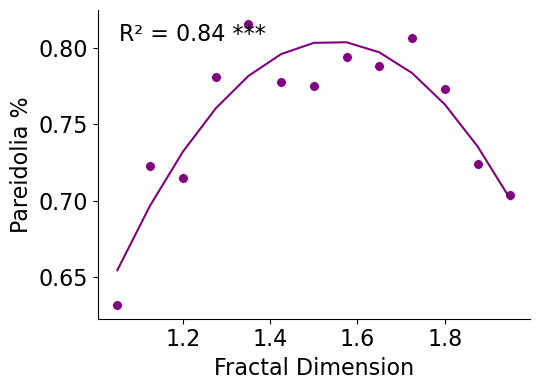

(None, 0.8398785648687679)

In [16]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from scipy import stats
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'FD' is already coded numerically for the example data.
# We need to assign numerical values to 'FD' if it's categorical.
# Since we don't have the actual data let's create an example 'FD' numerical variable

variable = 'parei'

# create 'pos_n_obj' variable which is removing the 0 values from the 'n_obj' variable
#data['pos_n_obj'] = data['n_obj']
#data['parei'] = data['pos_n_obj'].replace(0, np.nan)
# Grouping by the numerical 'FD' to get the mean of 'parei'
mean_parei = data.groupby('FD')[variable].mean().reset_index()

# Creating the quadratic fit model
quadratic_fit = make_pipeline(PolynomialFeatures(2), LinearRegression())
quadratic_fit.fit(mean_parei[['FD']], mean_parei[variable])

# Predicting over the observed range
mean_parei['parei_pred'] = quadratic_fit.predict(mean_parei[['FD']])

# Calculating R^2 value
r2 = r2_score(mean_parei[variable], mean_parei['parei_pred'])

# Calculating F-statistic
n = len(mean_parei[variable])  # number of observations
k = 2  # number of predictors, k=2 for a quadratic fit
f_statistic = (r2 / (1 - r2)) * (n - k - 1) / k
p_value = stats.f.sf(f_statistic, k, n - k - 1)  # p-value for F-statistic
# Plotting
plt.figure(figsize=(5.5, 4))
sns.scatterplot(data=mean_parei, x='FD', y=variable, color='purple', s=50)
sns.lineplot(data=mean_parei, x='FD', y='parei_pred', color='purple')
significance_level = '***'  # Replace with actual significance level determined by your statistical test
plt.annotate(f'R² = {r2:.2f} {significance_level}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=16)
# Annotating the R^2 value on the plot
# remove border of the plot
plt.gca().spines['top'].set_visible(False)
# right border
plt.gca().spines['right'].set_visible(False)
# remove grid
plt.grid(False)
# move title up a little bit
#plt.title('Quadratic Fit of Number of Percepts Across FD', fontsize=20, y=1.15)
plt.xlabel('Fractal Dimension', fontsize=16)
plt.ylabel('Pareidolia %', fontsize=16)
# set tick labels from 0.65 to 0.85 with 0.05 intervals
plt.yticks(np.arange(0.65, 0.85, 0.05))

# set tick font size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('C:/Users/Antoine/github/MEG_pareidolia/pareidolia_across_FD.png', dpi=300)
plt.show(), r2


In [21]:


# Group by 'FD' and calculate mean of 'parei'
mean_parei = data.groupby('FD')['parei'].mean().reset_index()

# Set up the quadratic fit model
quadratic_fit = make_pipeline(PolynomialFeatures(2), LinearRegression())
quadratic_fit.fit(mean_parei[['FD']], mean_parei['parei'])

# Predict using the fitted model
mean_parei['parei_pred'] = quadratic_fit.predict(mean_parei[['FD']])

# Calculate R^2 value
r2 = r2_score(mean_parei['parei'], mean_parei['parei_pred'])

# Calculate F-statistic
n = len(mean_parei['parei'])  # number of observations
p = 2  # number of predictors in the model, p=2 for a quadratic model
df1 = p  # degrees of freedom for the model
df2 = n - df1 - 1  # degrees of freedom for the error
ssr = r2 * (n - 1)  # regression sum of squares
sse = (1 - r2) * (n - 1)  # error sum of squares
msr = ssr / df1  # mean square regression
mse = sse / df2  # mean square error
f_statistic = msr / mse
p_value = stats.f.sf(f_statistic, df1, df2)

# Print the results
print(f'F({df1}, {df2}) = {f_statistic:.2f}, p = {p_value:.3f}, R^2 = {r2:.2f}')

# Rest of the plotting code...

F(2, 10) = 26.23, p = 0.000, R^2 = 0.84


In [17]:
# Replace 0 with NaN in 'n_obj' and create a 'parei' column
data['parei'] = data['n_obj'].replace(0, np.nan)

# Group by 'FD' and calculate mean of 'parei'
mean_parei = data.groupby('FD')['parei'].mean().reset_index()

# Set up the quadratic fit model
quadratic_fit = make_pipeline(PolynomialFeatures(2), LinearRegression())
quadratic_fit.fit(mean_parei[['FD']], mean_parei['parei'])

# Predict using the fitted model
mean_parei['parei_pred'] = quadratic_fit.predict(mean_parei[['FD']])

# Calculate R^2 value
r2 = r2_score(mean_parei['parei'], mean_parei['parei_pred'])

# Calculate F-statistic
n = len(mean_parei['parei'])  # number of observations
p = 2  # number of predictors in the model, p=2 for a quadratic model
df1 = p  # degrees of freedom for the model
df2 = n - df1 - 1  # degrees of freedom for the error
ssr = r2 * (n - 1)  # regression sum of squares
sse = (1 - r2) * (n - 1)  # error sum of squares
msr = ssr / df1  # mean square regression
mse = sse / df2  # mean square error
f_statistic = msr / mse
p_value = stats.f.sf(f_statistic, df1, df2)

# Print the results
print(f'F({df1}, {df2}) = {f_statistic:.2f}, p = {p_value:.3f}, R^2 = {r2:.2f}')

# Rest of the plotting code...

F(2, 10) = 97.80, p = 0.000, R^2 = 0.95


In [37]:
data['n_obj']

0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
3614    2.0
3615    1.0
3616    0.0
3617    0.0
3618    0.0
Name: n_obj, Length: 3619, dtype: float64

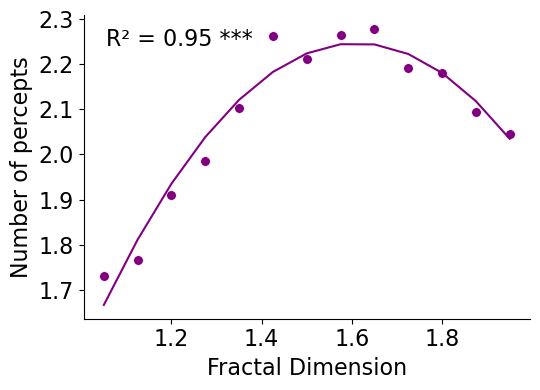

(None, 0.9513596709938504)

In [62]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from scipy import stats

# Assuming 'FD' is already coded numerically for the example data.
# We need to assign numerical values to 'FD' if it's categorical.
# Since we don't have the actual data let's create an example 'FD' numerical variable

variable = 'pos_n_obj'

# create 'pos_n_obj' variable which is removing the 0 values from the 'n_obj' variable
data['pos_n_obj'] = data['n_obj']
data['pos_n_obj'] = data['pos_n_obj'].replace(0, np.nan)
# Grouping by the numerical 'FD' to get the mean of 'parei'
mean_parei = data.groupby('FD')[variable].mean().reset_index()

# Creating the quadratic fit model
quadratic_fit = make_pipeline(PolynomialFeatures(2), LinearRegression())
quadratic_fit.fit(mean_parei[['FD']], mean_parei[variable])

# Predicting over the observed range
mean_parei['parei_pred'] = quadratic_fit.predict(mean_parei[['FD']])

# Calculating R^2 value
r2 = r2_score(mean_parei[variable], mean_parei['parei_pred'])

# Calculating F-statistic
n = len(mean_parei[variable])  # number of observations
k = 2  # number of predictors, k=2 for a quadratic fit
f_statistic = (r2 / (1 - r2)) * (n - k - 1) / k
p_value = stats.f.sf(f_statistic, k, n - k - 1)  # p-value for F-statistic
# Plotting
plt.figure(figsize=(5.5, 4))
sns.scatterplot(data=mean_parei, x='FD', y=variable, color='purple', s=50)
sns.lineplot(data=mean_parei, x='FD', y='parei_pred', color='purple')
significance_level = '***'  # Replace with actual significance level determined by your statistical test
plt.annotate(f'R² = {r2:.2f} {significance_level}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=16)
# Annotating the R^2 value on the plot
# remove border of the plot
plt.gca().spines['top'].set_visible(False)
# right border
plt.gca().spines['right'].set_visible(False)
# remove grid
plt.grid(False)
# move title up a little bit
#plt.title('Quadratic Fit of Number of Percepts Across FD', fontsize=20, y=1.15)
plt.xlabel('Fractal Dimension', fontsize=16)
plt.ylabel('Number of percepts', fontsize=16)
# set tick font size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('C:/Users/Antoine/github/MEG_pareidolia/Number_of_percepts_across_FD.png', dpi=300)
plt.show(), r2


c:\Users\Antoine\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Antoine\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


3.701190190335257e-06
F(2, 10) = 56.00, p = < 0.001, R^2 = 0.92
0.008831446417518485
F(2, 10) = 7.88, p = 0.009, R^2 = 0.61


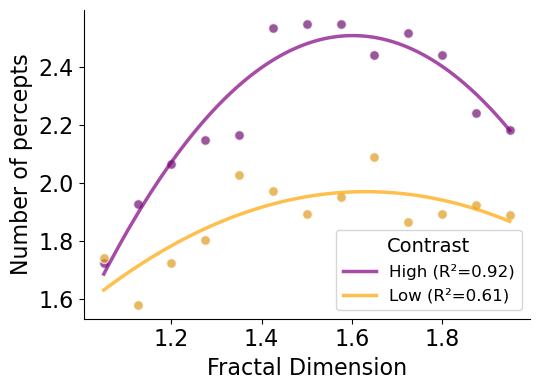

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'data' is your DataFrame

data['pos_n_obj'] = data['n_obj']
data['pos_n_obj'] = data['pos_n_obj'].replace(0, np.nan)

# Plotting setup
plt.figure(figsize=(5.5, 4))
contrast_names = ['High', 'Low']
colors = ['purple', 'orange']
# Loop through each contrast and plot their quadratic fit
for participant, contrast, color in zip(data['participant'].unique(), contrast_names, colors):
    participant_data = data[data['contrast'] == participant]
    participant_data = participant_data.groupby('FD')['pos_n_obj'].mean().reset_index()

    # Fit quadratic model for this contrast
    quadratic_fit = make_pipeline(PolynomialFeatures(2), LinearRegression())
    quadratic_fit.fit(participant_data[['FD']], participant_data['pos_n_obj'])

    # Predict over the observed range for this contrast
    x_values = np.linspace(participant_data['FD'].min(), participant_data['FD'].max(), 100)
    y_pred = quadratic_fit.predict(x_values.reshape(-1, 1))

    # Calculate R^2 value for this contrast
    r2 = r2_score(participant_data['pos_n_obj'], quadratic_fit.predict(participant_data[['FD']]))
    f_statistic = (r2 / (1 - r2)) * (n - k - 1) / k
    p_value = stats.f.sf(f_statistic, k, n - k - 1)  # p-value for F-statistic
    if p_value < 0.05:
        significance_level = '*'
    if p_value < 0.01:
        significance_level = '**'
    if p_value < 0.001:
        significance_level = '***'
    else:
        significance_level = ''
    # Plot the curve for this contrast
    plt.plot(x_values, y_pred, label=f'{contrast} (R²={r2:.2f})', color=color, linewidth=2.5, alpha=0.7)
    # make color more dark for the scatter plot
    color = sns.desaturate(color, 0.75)
    plt.scatter(participant_data['FD'], participant_data['pos_n_obj'], alpha=0.7, edgecolor='w', color=color, s=50)

    # add significance level
    #plt.annotate(f'{significance_level}', xy=(0.05, 0.85 - 0.05 * participant), 
    #             xycoords='axes fraction', fontsize=12)
    
    print(p_value)
    p = 2  # number of predictors in the model, p=2 for a quadratic model
    df1 = p  # degrees of freedom for the model
    df2 = n - df1 - 1  # degrees of freedom for the error
    if p_value < 0.001:
        p_value = '< 0.001'
    else:
        p_value = f'{p_value:.3f}'
    print(f'F({df1}, {df2}) = {f_statistic:.2f}, p = {p_value}, R^2 = {r2:.2f}')
    # Annotate the R^2 value on the plot
    #plt.annotate(f'R² (Contrast {participant}) = {r2:.2f}', xy=(0.05, 0.85 - 0.05 * participant), 
    #             xycoords='axes fraction', fontsize=12)

# Customize the plot appearance
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
plt.xlabel('Fractal Dimension', fontsize=16)
plt.ylabel('Number of percepts', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Contrast', fontsize=12, title_fontsize=14)
plt.tight_layout()

plt.savefig('C:/Users/Antoine/github/MEG_pareidolia/n_objects_across_FD_contrast.png', dpi=300)
# Display the plot
plt.show()


c:\Users\Antoine\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Antoine\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


0.014878817557028226
F(2, 10) = 6.60, p = 0.015, R^2 = 0.57
9.621146045722449e-05
F(2, 10) = 26.79, p = < 0.001, R^2 = 0.84


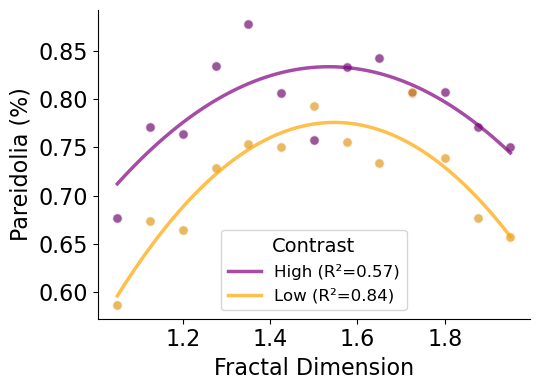

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'data' is your DataFrame

data['pos_n_obj'] = data['n_obj']
data['pos_n_obj'] = data['pos_n_obj'].replace(0, np.nan)

# Plotting setup
plt.figure(figsize=(5.5, 4))
contrast_names = ['High', 'Low']
colors = ['purple', 'orange']
# Loop through each contrast and plot their quadratic fit
for participant, contrast, color in zip(data['participant'].unique(), contrast_names, colors):
    participant_data = data[data['contrast'] == participant]
    participant_data = participant_data.groupby('FD')['parei'].mean().reset_index()

    # Fit quadratic model for this contrast
    quadratic_fit = make_pipeline(PolynomialFeatures(2), LinearRegression())
    quadratic_fit.fit(participant_data[['FD']], participant_data['parei'])

    # Predict over the observed range for this contrast
    x_values = np.linspace(participant_data['FD'].min(), participant_data['FD'].max(), 100)
    y_pred = quadratic_fit.predict(x_values.reshape(-1, 1))

    # Calculate R^2 value for this contrast
    r2 = r2_score(participant_data['parei'], quadratic_fit.predict(participant_data[['FD']]))
    f_statistic = (r2 / (1 - r2)) * (n - k - 1) / k
    p_value = stats.f.sf(f_statistic, k, n - k - 1)  # p-value for F-statistic
    if p_value < 0.05:
        significance_level = '*'
    if p_value < 0.01:
        significance_level = '**'
    if p_value < 0.001:
        significance_level = '***'
    else:
        significance_level = ''
    # Plot the curve for this contrast
    plt.plot(x_values, y_pred, label=f'{contrast} (R²={r2:.2f})', color=color, linewidth=2.5, alpha=0.7)
    # make color more dark for the scatter plot
    color = sns.desaturate(color, 0.75)
    plt.scatter(participant_data['FD'], participant_data['parei'], alpha=0.7, edgecolor='w', color=color, s=50)
    

    # add significance level
    #plt.annotate(f'{significance_level}', xy=(0.05, 0.85 - 0.05 * participant), 
    #             xycoords='axes fraction', fontsize=12)
    
    print(p_value)
    p = 2  # number of predictors in the model, p=2 for a quadratic model
    df1 = p  # degrees of freedom for the model
    df2 = n - df1 - 1  # degrees of freedom for the error
    if p_value < 0.001:
        p_value = '< 0.001'
    else:
        p_value = f'{p_value:.3f}'
    print(f'F({df1}, {df2}) = {f_statistic:.2f}, p = {p_value}, R^2 = {r2:.2f}')
    # Annotate the R^2 value on the plot
    #plt.annotate(f'R² (Contrast {participant}) = {r2:.2f}', xy=(0.05, 0.85 - 0.05 * participant), 
    #             xycoords='axes fraction', fontsize=12)


# print the stats in that format : (F(2, 10) = 97.80, p < 0.001, R2 = 0.95)

# Customize the plot appearance
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
plt.xlabel('Fractal Dimension', fontsize=16)
plt.ylabel('Pareidolia (%)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Contrast', fontsize=12, title_fontsize=14)
plt.tight_layout()

plt.savefig('C:/Users/Antoine/github/MEG_pareidolia/parei_across_FD_contrast.png', dpi=300)
# Display the plot
plt.show()
